<h1 style="font-size:3rem; color: darkmagenta;">Data Aggregation and Group Operations:</h1>

<h1 style="font-size:2.3rem; color: darkcyan;">10.4 Pivot Tables and Cross-Tabulation:</h1>

## Table of Contents

- 10.41  **[Pivot Tables](#Pivot)**
   
- 10.42  **[Cross-Tabulations: Crosstab](#Crosstab)**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore") 

<a id="Pivot"></a>
## 10.41 Pivot Tables

A *pivot table* is a data summarization tool frequently found in spreadsheet programs and other data analysis software. It aggregates a table of data by one or more keys, arranging the data in a rectangle with some of the group keys along the rows and some along the columns. Pivot tables in Python with pandas are made possible through the `groupby` facility described in this chapter combined with reshape operations utilizing hierarchical indexing. DataFrame has a `pivot_table` method, and there is also a top-level `pandas.pivot_table` function. In addition to providing a convenience interface to `groupby`, `pivot_table` can add partial totals, also known as *margins*.

Returning to the tipping dataset, suppose you wanted to compute a table of group means (the default `pivot_table` aggregation type) arranged by `day` and `smoker` on the rows:

In [5]:
tips = pd.read_csv('tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [7]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker')


size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

This could have been produced with `groupby` directly. Now, suppose we want to aggregate only `tip_pct` and `size`, and additionally group by `time`. I’ll put `smoker` in the table columns and day in the rows:

In [9]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

We could augment this table to include partial totals by passing `margins=True`. This has the effect of adding `All` row and column labels, with corresponding values being the group statistics for all the data within a single tier:

In [8]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

Here, the `All` values are means without taking into account smoker versus non-smoker (the `All` columns) or any of the two levels of grouping on the rows (the `All` row).

To use a different aggregation function, pass it to `aggfunc`. For example, `'count'` or `len` will give you a cross-tabulation (count or frequency) of group sizes:

In [9]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

If some combinations are empty (or otherwise NA), you may wish to pass a `fill_value`:

In [10]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

See Table 10-2 for a summary of `pivot_table` methods.

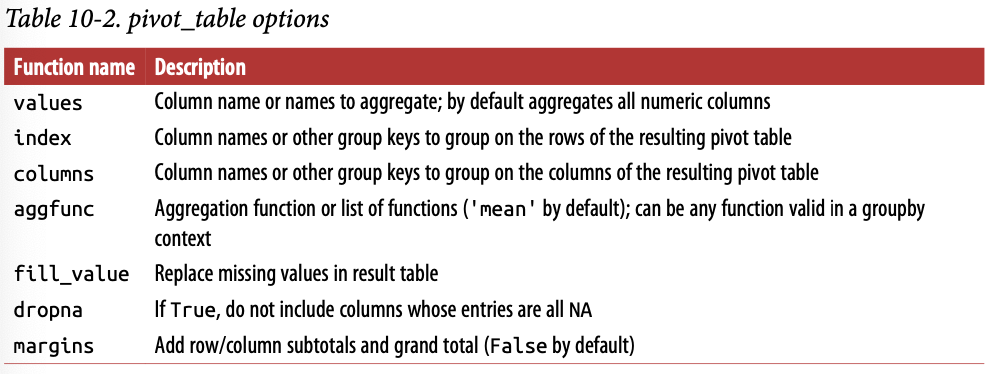

<a id="Crosstab"></a>
## 10.42 Cross-Tabulations: Crosstab

A cross-tabulation (or `crosstab` for short) is a special case of a pivot table that computes group frequencies. Here is an example:

In [11]:
from io import StringIO
#! blockstart
data = """Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
#! blockend
data = pd.read_table(StringIO(data), sep="\s+")

In [12]:
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


As part of some survey analysis, we might want to summarize this data by nationality and handedness. You could use `pivot_table` to do this, but the `pandas.crosstab` function can be more convenient:

In [13]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


The first two arguments to `crosstab` can each either be an array or Series or a list of arrays. As in the tips data:

In [14]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [15]:
#Let's take a look at another example

# First, create an example dataset
np.random.seed(0)

# Generate data for 50 students
num_students = 50
math_scores = np.random.randint(50, 100, num_students)
school_types = np.random.choice(['Public', 'Private'], num_students)
genders = np.random.choice(['Male', 'Female'], num_students)

# Create a DataFrame
df = pd.DataFrame({
    'Math_Score': math_scores,
    'School_Type': school_types,
    'Gender': genders
})

df.head(10)


,Math_Score,School_Type,Gender
0,94,Public,Male
1,97,Private,Male
2,50,Public,Male
3,53,Private,Male
4,53,Public,Male
5,89,Public,Female
6,59,Public,Male
7,69,Public,Female
8,71,Public,Male
9,86,Private,Female


In [16]:
# calculate the number of male and female students in different school types
cross_table1 = pd.crosstab(df['School_Type'], df['Gender'])
cross_table1


Gender,Female,Male
School_Type,,
Private,13,11
Public,13,13


In [17]:
# Calculate the average math scores by school type
average_scores_by_school_type = df.groupby('School_Type')['Math_Score'].mean()
average_scores_by_school_type


School_Type
Private    72.5
Public     72.0
Name: Math_Score, dtype: float64

In [18]:
# Add a column to represent grade levels
df['Grade'] = pd.cut(df['Math_Score'], bins=[0, 60, 80, 100], labels=['C', 'B', 'A'])
df.head()

,Math_Score,School_Type,Gender,Grade
0,94,Public,Male,A
1,97,Private,Male,A
2,50,Public,Male,C
3,53,Private,Male,C
4,53,Public,Male,C


In [19]:
# analyze the number of male and female students in different grade levels
cross_table_grade_gender = pd.crosstab(df['Grade'], df['Gender'])
cross_table_grade_gender


Gender,Female,Male
Grade,,
C,4,9
B,14,7
A,8,8


In [20]:
# analyze the distribution of school types in different grade levels
cross_table_grade_school_type = pd.crosstab(df['Grade'], df['School_Type'])
cross_table_grade_school_type


School_Type,Private,Public
Grade,,
C,6,7
B,10,11
A,8,8


In [21]:
# Create a multi-indexed cross-tabulation
cross_table2 = pd.crosstab([df['School_Type'], df['Gender']], df['Grade'])
cross_table2


Grade               C  B  A
School_Type Gender         
Private     Female  2  6  5
            Male    4  4  3
Public      Female  2  8  3
            Male    5  3  5

In [22]:
# Create a multi-indexed cross-tabulation with average math scores
cross_table3 = pd.crosstab([df['School_Type'], df['Gender']], df['Grade'], values=df['Math_Score'], aggfunc='mean')
cross_table3


Grade                  C          B          A
School_Type Gender                            
Private     Female  53.0  70.333333  87.400000
            Male    57.5  69.000000  89.666667
Public      Female  57.5  71.625000  86.333333
            Male    52.6  67.000000  92.200000

### Conclusion

Mastering pandas’s data grouping tools can help both with data cleaning as well as modeling or statistical analysis work.